# Πρακτική Μηχανική Μάθηση 

## Ευαγγελιδάκης Λέανδρος



Εισαγωγή απαραίτητων βιβλιοθηκών

In [9]:
import numpy as np
from matplotlib               import pyplot as plt
from scipy import stats
from sklearn.preprocessing    import StandardScaler        
from sklearn.model_selection  import train_test_split      
from sklearn.metrics          import classification_report 
from sklearn.metrics          import confusion_matrix      
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model     import Ridge                 
from sklearn.svm              import SVC                   
from sklearn.neighbors        import KNeighborsClassifier 
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.linear_model import RidgeCV,LassoCV
from sklearn import metrics
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import preprocessing
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
import seaborn as sns
plt.style.use('seaborn')
from sklearn.preprocessing import OneHotEncoder

Εισαγωγή δεδομένων

In [10]:
auctions=pd.read_csv('auction_data.csv')

Παρακάτω φαίνονται οι 5 πρώτες καταχωρήσεις των δεδομένων και κάποια βασικά στατιστικά. Οι μεταβλητές SellerId και ItemId είναι ουσιαστικά κατηγορίες και τις μετατρέπουμε σε τύπο string.

In [11]:
auctions.head()

,SellerId,SellerRating,ItemId,StartingBid,Price,NumBidders
0,144.0,84.11,6.0,137.0,145.5,2.0
1,40.0,93.76,0.0,30.0,30.0,0.0
2,102.0,94.52,12.0,364.0,1278.0,8.0
3,77.0,97.41,2.0,82.0,106.5,3.0
4,54.0,80.32,4.0,173.0,173.0,0.0


In [12]:
auctions['SellerId'] = auctions['SellerId'].astype('str')
auctions[' ItemId'] = auctions[' ItemId'].astype('str')

In [13]:
auctions.dtypes

SellerId          object
 SellerRating    float64
 ItemId           object
 StartingBid     float64
 Price           float64
 NumBidders      float64
dtype: object

In [14]:
auctions.describe(include='all')

,SellerId,SellerRating,ItemId,StartingBid,Price,NumBidders
count,18842,18842.000000,18842,18842.000000,18842.000000,18842.000000
unique,150,NaN,13,NaN,NaN,NaN
top,132.0,NaN,7.0,NaN,NaN,NaN
freq,181,NaN,1558,NaN,NaN,NaN
mean,NaN,90.046164,NaN,316.835899,393.979753,2.242172
std,NaN,6.009262,NaN,350.345270,384.044470,2.016307
min,NaN,80.050000,NaN,1.000000,1.250000,0.000000
25%,NaN,84.820000,NaN,80.000000,135.500000,0.000000
50%,NaN,90.460000,NaN,181.000000,235.500000,2.000000
75%,NaN,94.990000,NaN,426.000000,568.000000,4.000000


Παρατηρούμε ότι έχουμε 150 χρήστες που πουλάνε 13 προιόντα.

Για τη μεταβλητή ItemId παράγουμε το παρακάτω ιστόγραμμα για κάθε μοναδική τιμή

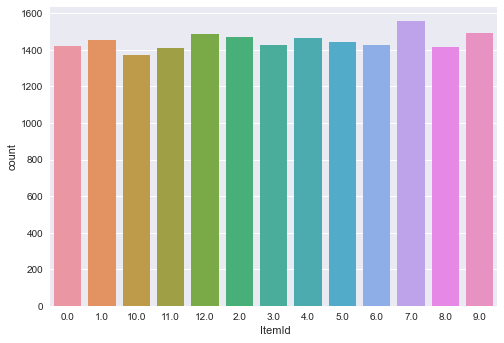

In [15]:
ax = sns.countplot(x=" ItemId", data=auctions)

Η μεταβλητή ItemId,δηλαδή τα προιόντα, αποτελείται από τους αριθμούς 0 έως 12 και οι συχνότητες εμφάνισης είναι παρόμοιες.

Έλεγχος για NaN δεδομένα. Όπως φαίνεται τα δεδομένα είναι πλήρης και δεν περιέχουν ελλείπουσες τιμές.

In [8]:
auctions.isnull().sum()

SellerId         0
 SellerRating    0
 ItemId          0
 StartingBid     0
 Price           0
 NumBidders      0
dtype: int64

## (a) Πρόβλεψη Τιμής Κλεισίματος

Για την εφαρμογή αλγορίθμων μηχανικής μάθησης χωρίζουμε τα δεδομένα σε train και test σε ποσοστό 80-20. Χρησιμοποιούμε one-hot encoding για τις μεταβλητές ItemId και SellerId.

In [16]:
#One-hot encoding ItemId column

dummies1=pd.get_dummies(auctions[' ItemId'], prefix='ItemId')
dummies2=pd.get_dummies(auctions['SellerId'], prefix='SellerId')

auctions = pd.concat([auctions,dummies1,dummies2],axis=1)

auctions.drop([' ItemId','SellerId'],axis=1, inplace=True)


In [17]:
auctions.head()

,SellerRating,StartingBid,Price,NumBidders,ItemId_0.0,ItemId_1.0,ItemId_10.0,ItemId_11.0,ItemId_12.0,ItemId_2.0,...,SellerId_90.0,SellerId_91.0,SellerId_92.0,SellerId_93.0,SellerId_94.0,SellerId_95.0,SellerId_96.0,SellerId_97.0,SellerId_98.0,SellerId_99.0
0,84.11,137.0,145.5,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,93.76,30.0,30.0,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,94.52,364.0,1278.0,8.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,97.41,82.0,106.5,3.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,80.32,173.0,173.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#Train-test split

auctions_x=auctions.drop([' Price'],axis=1)

X=auctions_x.values
y=auctions[' Price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=77, test_size=0.2)

In [20]:
print(X_train.shape)
print(X_test.shape)

(15073, 166)
(3769, 166)


Όπως φαίνεται παραπάνω έχουμε 15.073 καταχωρήσεις για εκμάθηση και 3.769 για έλεγχο.

Παρακάτω δημιουργούμε μια συνάρτηση όπου υπολογίζει το διάστημα εμπιστοσύνης (95%) για τις προβλεπόμενες τιμές και απεικονίζει τις πραγματικές τιμές (50 πρώτες) μαζί με τις αντίστοιχες προβλέψεις.

In [21]:
def plot_results(y_test,y_pred):
    '''Plot predictions vs original data with 95% CI'''
    
    stdev = np.sqrt(sum((y_pred - y_test)**2) / (len(y_train) - 2))
    interval = 1.96 * stdev #Για επίπεδο σημαντικότητας α=0.05 , z=1.96 (από πίνακα Κανονικής Κατανομής)

    df = pd.DataFrame({'Actual Price': y_test.flatten(), 'Predicted Price': y_pred.flatten()})
    df_plot = df.head(50)
    df_plot.plot(kind='bar',figsize=(16,8),yerr=interval,ecolor='red')
    plt.grid(color='white')
    plt.title('Actual vs Predicted Prices',fontsize=20)
    plt.show()


Επιπλέον κατασκευάζουμε συνάρτηση στην οποία θα δίνουμε ένα μοντέλο, θα υπολογίζει τις μετρικές και θα τις επιστρέφει μαζί με το αντίστοιχο γράφημα που παράγεται από την παραπάνω συνάρτηση.

In [22]:
def fit_and_report(clf,y_test,alpha=False):
    '''Fit a model and return report'''
    
    #Alpha parameter for models with penalty
    if alpha==True:
        print('Alpha parameter: ',clf.alpha_)

    y_pred = clf.predict(X_test)

    plot_results(y_test,y_pred)
    
    print('R^2 on train set :',clf.score(X_train, y_train))
    print('R^2 on test set :',clf.score(X_test, y_test))
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

## Linear Regression

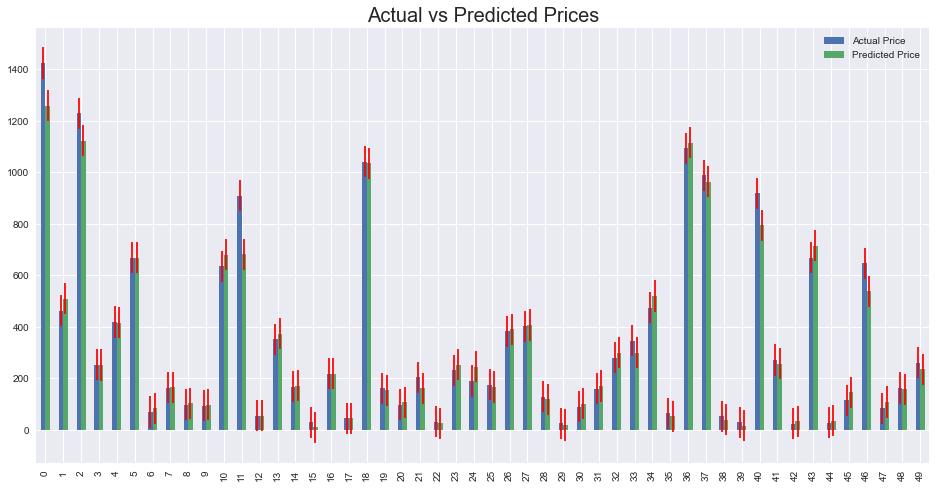

R^2 on train set : 0.9756336583737634
R^2 on test set : 0.9740225812584035
Mean Absolute Error: 35.466745119001224
Mean Squared Error: 3812.8668698934716
Root Mean Squared Error: 61.74841593023639


In [15]:
reg = LinearRegression().fit(X_train, y_train)

fit_and_report(reg,y_test)

## Ridge Regression

Χρησιμοποιούμε την ίδια διαδικασία όπως και για την γραμμική παλινδρόμηση. Εδώ εφαρμόζουμε το RidgeCV όπου επιλέγει αυτόματα την βέλτιστη παράμετρο alpha για το regularization, μέσω 10-fold cross-validation.

Alpha parameter:  1.0


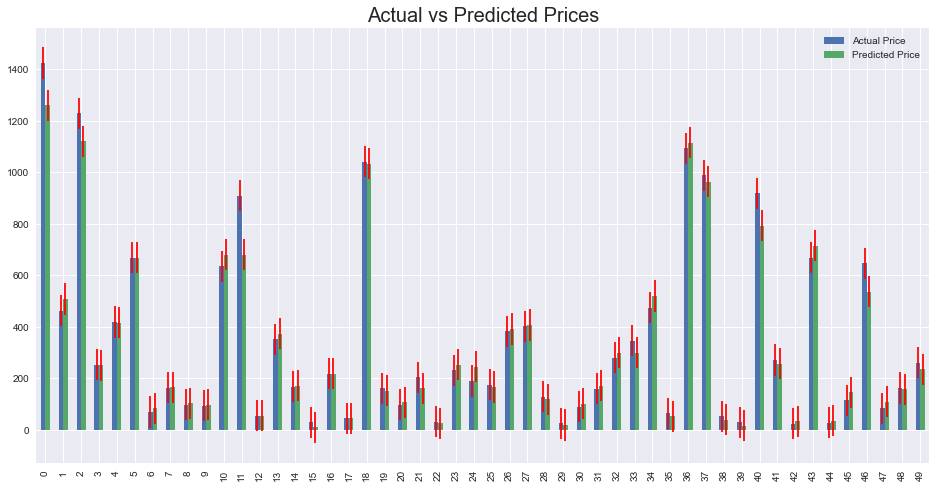

R^2 on train set : 0.975632065870068
R^2 on test set : 0.9740429271760096
Mean Absolute Error: 35.496366736103724
Mean Squared Error: 3809.880573373789
Root Mean Squared Error: 61.72423003467754


In [17]:
ridge_reg = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1],cv=10).fit(X_train, y_train)

fit_and_report(ridge_reg,y_test,alpha=True)

## Lasso Regression

Με τον ίδιο τρόπου που εφαρμόσαμε το RidgeCV εφαρμόζουμε τώρα το LassoCV με 10-fold CV για την επιλογή της παραμέτρου alpha.

Alpha parameter:  0.1


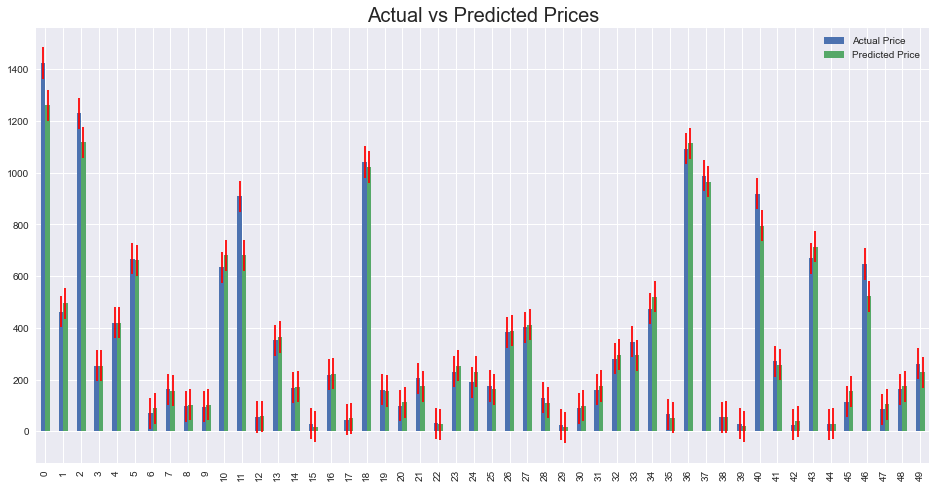

R^2 on train set : 0.975351563514773
R^2 on test set : 0.974299134751405
Mean Absolute Error: 35.147586769134875
Mean Squared Error: 3772.2753984425362
Root Mean Squared Error: 61.41885214201366


In [18]:
lasso_reg = LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1],cv=10,max_iter=100000,n_jobs=-1,random_state=77).fit(X_train, y_train)

fit_and_report(lasso_reg,y_test,alpha=True)

## Stohastic Gradient Descent Regressor

Για την χρήση SGD επιπλέον κάνουμε τυποποίηση  στα δεδομένα.

In [19]:
sgd_reg = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3,random_state=77))

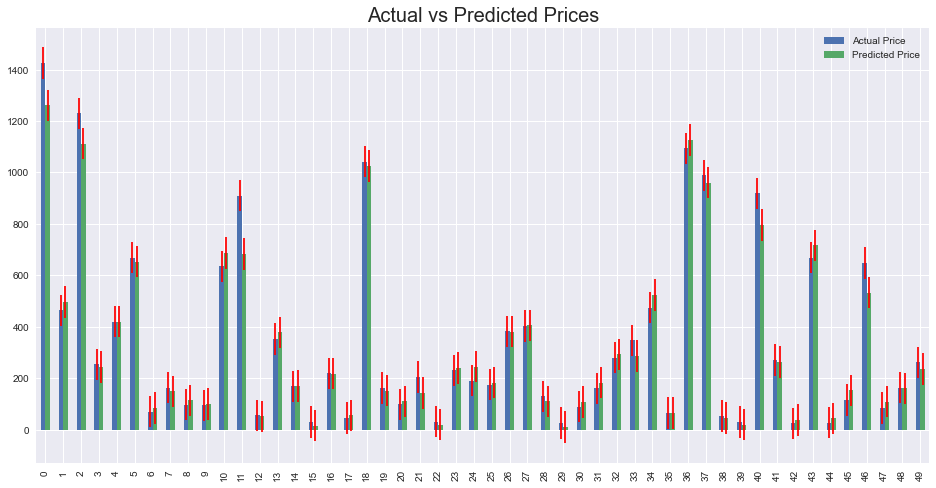

R^2 on train set : 0.9750027069330522
R^2 on test set : 0.9735853350031333
Mean Absolute Error: 36.41131952022137
Mean Squared Error: 3877.044214736261
Root Mean Squared Error: 62.26591535291408


In [20]:
sgd_reg.fit(X_train, y_train)

fit_and_report(sgd_reg,y_test)

## Random Forests Regressor

Παρακάτω χρησιμοποιούμε την ensebmle μέθοδο Random Forest. Για την επιλογή των υπερπαραμέτρων του αλγορίθμου χρησιμοποιούμε Grid Search αλλα εξετάζοντας ένα τυχαίο δείγμα από το σύνολο των επιλογών για παραμέτρους (για εξοικονόμηση χρόνου), χρησιμοποιώντας τη μέθοδο RandomizedSearchCV του sklearn. Η επιλογή γίνεται μέσω 5-fold Cross Validation και 100 φορες, δηλαδή συνολικά γίνονται 500 fits στα δεδομένα.

In [456]:
rfc = RandomForestRegressor()

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 20)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 200, num = 10)]
max_depth.append(None)

options_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }

rand_forest = RandomizedSearchCV(estimator = rfc, param_distributions = options_grid, n_iter = 100, cv = 5, verbose=2, random_state=77, n_jobs = -1)
rand_forest.fit(X_train, y_train)

print(rand_forest.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 12.8min finished


{'n_estimators': 289, 'max_features': 'sqrt', 'max_depth': 31}


Οι προτεινόμενες παράμετροι είναι 289 εκτιμητές, με πλήθος χαρακτηριστικών την τετραγωνική ρίζα του πλήθους των μεταβλητών μας και μέγιστο βάθος δένδρου 31.

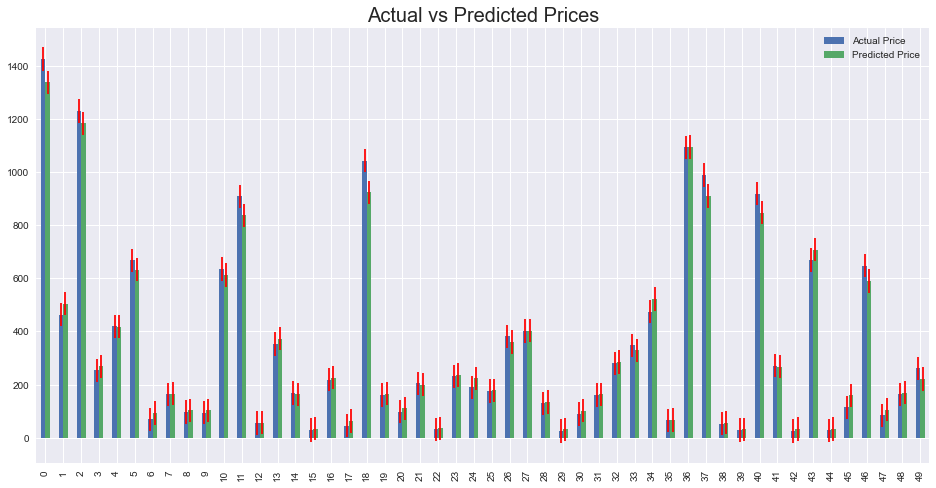

R^2 on train set : 0.9937802032857228
R^2 on test set : 0.9863479964437528
Mean Absolute Error: 23.153308255503877
Mean Squared Error: 2003.7892365314904
Root Mean Squared Error: 44.76370445496541


In [23]:
rand_forest = RandomForestRegressor(n_estimators=289, max_features = 'sqrt', max_depth= 31, random_state=77,n_jobs=-1).fit(X_train, y_train)

y_pred = rand_forest.predict(X_test)


fit_and_report(rand_forest,y_test)

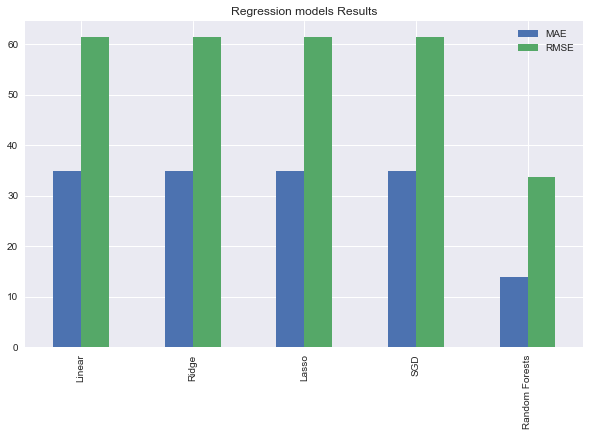

In [477]:
results_mae=[34.8756976667401,34.881196611895916,34.878098692137876,34.85065971525557,13.924855131947732]
results_rmse=[61.44971209680265,61.448053113819476,61.44901675629336,61.48047388764597,33.61926662839836]

res_df=pd.DataFrame(list(zip(results_mae,results_rmse)),index=['Linear','Ridge','Lasso','SGD','Random Forests'],columns=['MAE','RMSE'])
plt=res_df.plot(kind='bar',title='Regression models Results',figsize=(10,6))


Όπως φαίνεται τις καλύτερες επιδόσεις παρουσιάζει ο αλγόριθμος Random Forests ενώ οι υπόλοιποι παρουσιάζουν αρκετά παρόμοια αποτελέσματα.

## (β) Πρόβλεψη αν η δημοπρασία θα οδηγήσει σε πώληση ή όχι

Αρχικά δημιουργούμε μια νέα δυαδική μεταβλητή (sold) η οποία θα έχει τιμές 1 ή 0 ανάλογα αν έγινε η πώληση ή όχι αντίστοιχα. Έτσι δεν χρειαζόμαστε τη μεταβλητή Price και NumBidders καθότι οι πληροφορία τους εμπεριέχεται πλέον στη νέα αυτή μεταβλητή. Χρησιμοποιούμε, όπως και πριν, One-hot encoding για το ItemId ενώ αφαιρούμε το SellerId. Παρατηρήθηκε ότι η χρήση του SellerId παρήγαγε χειρότερα αποτελέσματα για το σκοπό της κατηγοριοποίησης.

In [24]:
#auctions2 = auctions.copy()
auctions2 = pd.read_csv('auction_data/auction_data.csv')
auctions2 = pd.concat([auctions2,dummies1],axis=1)
auctions2.drop([' ItemId','SellerId'],axis=1, inplace=True)


def sold(row):
    if row[' NumBidders'] == 0:
        val = 0
    else:
        val = 1
    return val

auctions2['sold'] = auctions.apply(sold, axis=1).astype('category')

auctions2.drop([' Price',' NumBidders'],axis=1, inplace=True)



In [25]:
auctions2.head()

,SellerRating,StartingBid,ItemId_0.0,ItemId_1.0,ItemId_10.0,ItemId_11.0,ItemId_12.0,ItemId_2.0,ItemId_3.0,ItemId_4.0,ItemId_5.0,ItemId_6.0,ItemId_7.0,ItemId_8.0,ItemId_9.0,sold
0,84.11,137.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,93.76,30.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,94.52,364.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,97.41,82.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,80.32,173.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [27]:
#Train-test set split and standardization

X=auctions2.iloc[:,:-1].values
y=auctions2.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=77, test_size=0.2)

X_train_scaled=StandardScaler().fit_transform(X_train)
X_test_scaled=StandardScaler().fit_transform(X_test)

## Logistic Regression

Αρχικά εφαρμόζουμε Λογιστική Παλινδρόμηση.

In [20]:
log_reg = LogisticRegression(random_state=77 ,max_iter=10000,n_jobs=-1).fit(X_train_scaled, y_train)

y_pred=log_reg.predict(X_test_scaled)

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))


=== Confusion Matrix ===
[[ 877  250]
 [  59 2583]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.94      0.78      0.85      1127
           1       0.91      0.98      0.94      2642

    accuracy                           0.92      3769
   macro avg       0.92      0.88      0.90      3769
weighted avg       0.92      0.92      0.92      3769



## Support Vector Machines

Εδώ,επιπλέον θα κάνουμε τυποποίηση των δεδομένων. Χρησιμοποιώντας τα δεδομένα ως έχουν ο αλγόριθμος δεν τερμάτιζε.
Ως συνάρτηση πυρήνα χρησιμοποιούμε την ακτινική βάση (RBF) καθώς παρήχε τα καλύτερα αποτελέσματα.

In [21]:
clf=SVC(kernel='rbf',random_state=77).fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))


=== Confusion Matrix ===
[[ 720  407]
 [  51 2591]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.93      0.64      0.76      1127
           1       0.86      0.98      0.92      2642

    accuracy                           0.88      3769
   macro avg       0.90      0.81      0.84      3769
weighted avg       0.89      0.88      0.87      3769



## KNN Classifier


Εφαρμόζουμε τη μέθοδο των Πλησιέστερων Γειτόνων  με μετρική την ευκλείδια απόσταση.

Αρχικά, για την εύρεση του βέλτιστου πλήθους γειτόνων (κ) υπολογίζουμε το μέσο ρυθμό σφάλματος για k από 1 έως 30.

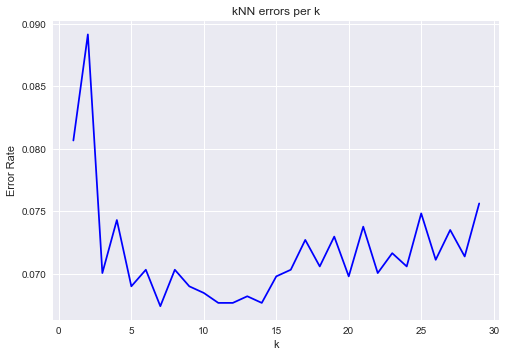

In [38]:
errors = []
K = range(1,30)
for k in K:
    knn = KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    knn = knn.fit(X_train_scaled, y_train)
    preds = knn.predict(X_test_scaled)
    errors.append(np.mean(preds != y_test))
    
plt.plot(K, errors, 'bx-')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.title('kNN errors per k')
plt.show()    

Θα επιλέξουμε 7 γείτονες για τον αλόριθμο.

In [83]:
neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(X_train_scaled, y_train)

y_pred = neigh.predict(X_test_scaled)

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))


=== Confusion Matrix ===
[[1009  118]
 [ 136 2506]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1127
           1       0.96      0.95      0.95      2642

    accuracy                           0.93      3769
   macro avg       0.92      0.92      0.92      3769
weighted avg       0.93      0.93      0.93      3769



## Random Forest Classifier

Παρακάτω χρησιμοποιούμε την ensebmle μέθοδο Random Forest. Για την επιλογή των υπερπαραμέτρων του αλγορίθμου χρησιμοποιούμε Grid Search αλλα εξετάζοντας ένα τυχαίο δείγμα από το σύνολο των επιλογών για παραμέτρους (για εξοικονόμηση χρόνου), χρησιμοποιώντας τη μέθοδο RandomizedSearchCV του sklearn. Η επιλογή γίνεται μέσω 5-fold Cross Validation και 100 φορες, δηλαδή συνολικά γίνονται 500 fits στα δεδομένα.

In [338]:
from sklearn.model_selection import RandomizedSearchCV

rfc = RandomForestClassifier()

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 20)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 200, num = 10)]
max_depth.append(None)

options_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }

rand_forest = RandomizedSearchCV(estimator = rfc, param_distributions = options_grid, n_iter = 100, cv = 5, verbose=2, random_state=77, n_jobs = -1)
rand_forest.fit(X_train, y_train)

print(rand_forest.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  5.7min finished


{'n_estimators': 857, 'max_features': 'auto', 'max_depth': 10}


Τώρα χρησιμοποιούμε τον αλγόριθμο με τις βέλτισες παραμέτρους που υπολογίστηκαν παραπάνω.

In [28]:
rand_forest = RandomForestClassifier(n_estimators=857, max_features = 'auto', max_depth= 10, random_state=77,n_jobs=-1).fit(X_train_scaled, y_train)

y_pred = rand_forest.predict(X_test_scaled)

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))


=== Confusion Matrix ===
[[ 988  139]
 [ 101 2541]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      1127
           1       0.95      0.96      0.95      2642

    accuracy                           0.94      3769
   macro avg       0.93      0.92      0.92      3769
weighted avg       0.94      0.94      0.94      3769



In [96]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{0: 1089, 1: 2680}

Αν και υπάρχουν μικρές διαφορές μεταξύ των αλγορίθμων, και όλοι αποδίδουν καλά αποτελέσματα, ο αλγόριθμος Random Forests πετυχαίνει τα καλύτερα (συνολικά). 

## (c) Ορισμός τιμής Εκκίνησης

Διαβάζουμε τα δεδομένα απ'την αρχή.

In [61]:
auctions = pd.read_csv('auction_data/auction_data.csv')
auctions['SellerId'] = auctions['SellerId'].astype('str')
auctions[' ItemId'] = auctions[' ItemId'].astype('str')

In [57]:
auctions.head()

,SellerId,SellerRating,ItemId,StartingBid,Price,NumBidders
0,144.0,84.11,6.0,137.0,145.5,2.0
1,40.0,93.76,0.0,30.0,30.0,0.0
2,102.0,94.52,12.0,364.0,1278.0,8.0
3,77.0,97.41,2.0,82.0,106.5,3.0
4,54.0,80.32,4.0,173.0,173.0,0.0


Παρακάτω φαίνεται το StartingBid σε συνάρτηση με τα αντικείμενα προς πώληση.

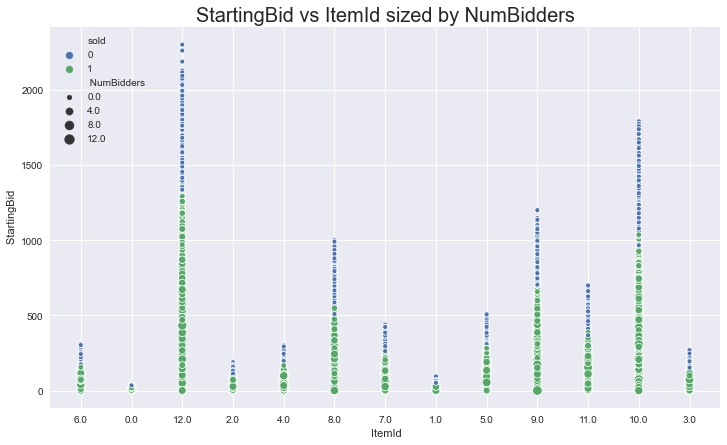

In [58]:
plt.figure(figsize=(12,7))
plt.title('StartingBid vs ItemId sized by NumBidders',fontsize=20)
ax=sns.scatterplot(x=" ItemId", y=" StartingBid",data=auctions, hue=auctions2['sold'],size=" NumBidders")


Αρχικά θα μεταβάλλουμε την τιμή εκκίνησης κατά ένα ποσοστό, για τις καταχωρήσεις όπου έγινε η πώληση. Στη συνέχεια θα χρησιμοποιήσουμε παλινδρόμηση για να δούμε εάν επιτυγχάνουμε καλύτερα αποτελέσματα με την αλλαγή αυτή.

In [29]:
auctions3 = auctions[ auctions2['sold']==1].copy()

In [30]:
auctions3_price = auctions3.loc[:,' Price'].copy()
auctions3.drop([' NumBidders',' Price'],inplace=True,axis=1)
auctions3[' Price'] = auctions3_price

In [31]:
auctions3.head()

,SellerRating,StartingBid,ItemId_0.0,ItemId_1.0,ItemId_10.0,ItemId_11.0,ItemId_12.0,ItemId_2.0,ItemId_3.0,ItemId_4.0,...,SellerId_91.0,SellerId_92.0,SellerId_93.0,SellerId_94.0,SellerId_95.0,SellerId_96.0,SellerId_97.0,SellerId_98.0,SellerId_99.0,Price
0,84.11,137.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,145.5
2,94.52,364.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1278.0
3,97.41,82.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,106.5
5,99.97,836.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1146.0
6,99.01,207.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,599.0


In [32]:
#Train-test set split and standardization

X=auctions3.iloc[:,:-1].values
y=auctions3.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=77, test_size=0.2)

X_train_scaled=StandardScaler().fit_transform(X_train)
X_test_scaled=StandardScaler().fit_transform(X_test)

Στη συνέχεια κατασκευάζουμε ένα μοντέλο πρόβλεψης της τελικής τιμής χρησιμοποιώντας Random Forests. Η διαφορα με πριν είναι ότι τώρα δεν χρησιμοποιούμε τη μεταβλητή NumBidders καθότι για τις νέες τιμές εκκίνησης δεν μπορούμε να έχουμε γνώση αυτού.

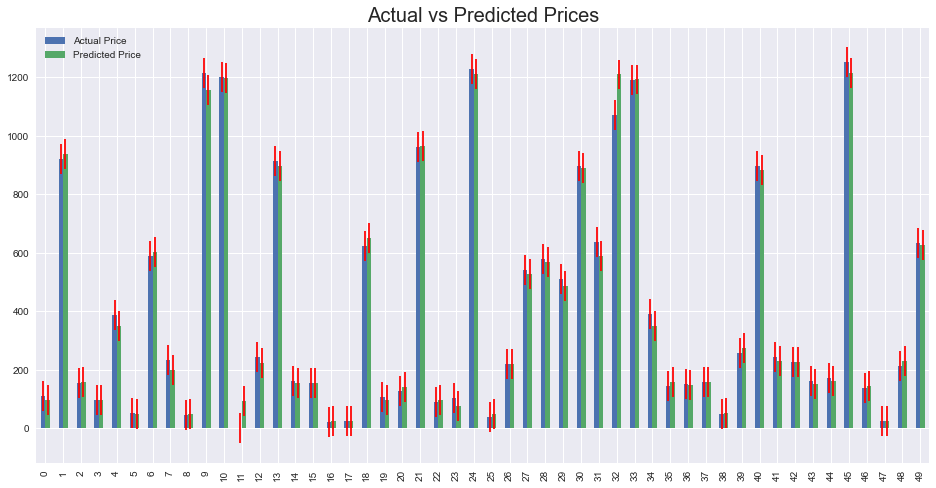

R^2 on train set : 0.996964175540723
R^2 on test set : 0.9776814949326835
Mean Absolute Error: 24.90237252737175
Mean Squared Error: 2733.0980829189257
Root Mean Squared Error: 52.27904056999254


In [39]:
rand_forest = RandomForestRegressor(n_estimators=300, max_features = 'auto', max_depth= 50, random_state=77,n_jobs=-1).fit(X_train, y_train)

y_pred = rand_forest.predict(X_test)

fit_and_report(rand_forest,y_test)


Αυξάνουμε την τιμή εκκίνησης κατά 10%, χωρίζουμε το σύνολο σε train-test και υπολογίζουμε για το test τις προβλέψεις. Στη συνέχεια υπολογίζουμε τη μέση τιμή της διαφροάς τους από τις αρχικές τιμές εκκίνησης.

In [40]:
starting_bid = auctions3.loc[:,' StartingBid'].copy()
new_starting_bid = starting_bid * 1.10
auctions3.loc[:,' StartingBid'] = new_starting_bid


In [41]:
X=auctions3.iloc[:,:-1].values
y=auctions3.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=77, test_size=0.2)

y_pred2 = rand_forest.predict(X_test)

In [49]:
np.mean(y_test-y_pred2)

-8.706846844285536

Όπως φαίνεται έχουμε, κατά μέσο όρο, αύξηση της τελικής τιμής μετά την αύξηση αυτή καθότι το αποτέλεσμα είναι αρνητικό κατά 8.71 μονάδες.